https://stepik.org/lesson/1370092/step/6

w: [-8.15553401 -0.15656274  1.78240069]
Qe: 0.5639720074688048
Q: 0.07


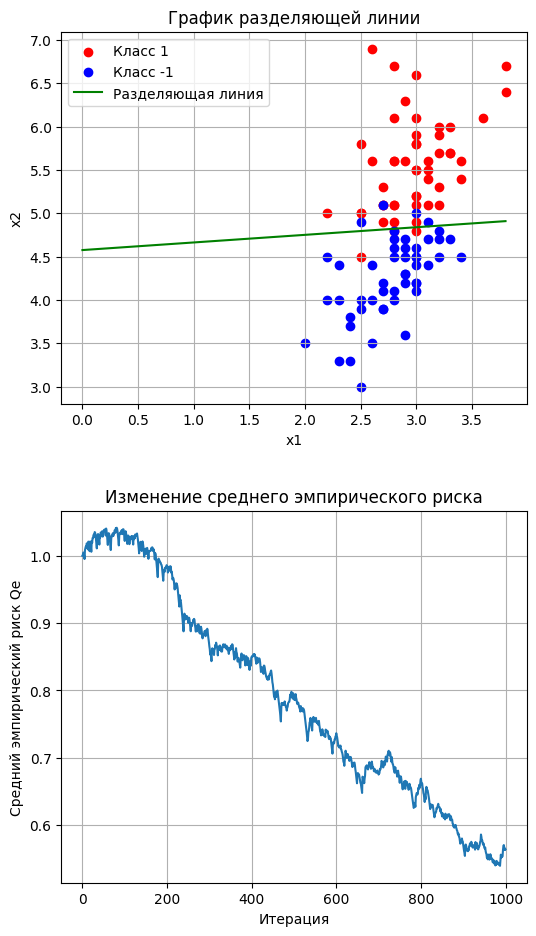

In [ ]:
import numpy as np
from numpy import log, log2, exp
import matplotlib.pyplot as plt


# логарифмическая функция потерь
loss = lambda w, x, y: log2(1 + exp(-x @ w * y))

# производная логарифмической функции потерь по вектору w
df = lambda w, x, y: -(exp(-x @ w * y) * x.T * y) / ((1 + exp(-x @ w * y)) * log(2))

# Данные
data_x = [(3.0, 4.9), (2.7, 3.9), (3.0, 5.5), (2.6, 4.0), (2.9, 4.3), (3.1, 5.1), (2.2, 4.5), (2.3, 3.3), (2.7, 5.1), (3.3, 5.7),
          (2.8, 5.1), (2.8, 4.9), (2.5, 4.5), (2.8, 4.7), (3.2, 4.7), (3.2, 5.7), (2.8, 6.1), (3.6, 6.1), (2.8, 4.8), (2.9, 4.5),
          (3.1, 4.9), (2.3, 4.4), (3.3, 6.0), (2.6, 5.6), (3.0, 4.4), (2.9, 4.7), (2.8, 4.0), (2.5, 5.8), (2.4, 3.3), (2.8, 6.7),
          (3.0, 5.1), (2.3, 4.0), (3.1, 5.5), (2.8, 4.8), (2.7, 5.1), (2.5, 4.0), (3.1, 4.4), (3.8, 6.7), (3.1, 5.6), (3.1, 4.7),
          (3.0, 5.8), (3.0, 5.2), (3.0, 4.5), (2.7, 4.9), (3.0, 6.6), (2.9, 4.6), (3.0, 4.6), (2.6, 3.5), (2.7, 5.1), (2.5, 5.0),
          (2.0, 3.5), (3.2, 5.9), (2.5, 5.0), (3.4, 5.6), (3.4, 4.5), (3.2, 5.3), (2.2, 4.0), (2.2, 5.0), (3.3, 4.7), (2.7, 4.1),
          (2.4, 3.7), (3.0, 4.2), (3.2, 6.0), (3.0, 4.2), (3.0, 4.5), (2.7, 4.2), (2.5, 3.0), (2.8, 4.6), (2.9, 4.2), (3.1, 5.4),
          (2.5, 4.9), (3.2, 5.1), (2.8, 4.5), (2.8, 5.6), (3.4, 5.4), (2.7, 3.9), (3.0, 6.1), (3.0, 5.8), (3.0, 4.1), (2.5, 3.9),
          (2.4, 3.8), (2.6, 4.4), (2.9, 3.6), (3.3, 5.7), (2.9, 5.6), (3.0, 5.2), (3.0, 4.8), (2.7, 5.3), (2.8, 4.1), (2.8, 5.6),
          (3.2, 4.5), (3.0, 5.9), (2.9, 4.3), (2.6, 6.9), (2.8, 5.1), (2.9, 6.3), (3.2, 4.8), (3.0, 5.5), (3.0, 5.0), (3.8, 6.4)]
data_y = [1, -1, 1, -1, -1, 1, -1, -1, -1, 1, 1, 1, 1, -1, -1, 1, 1, 1, -1, -1, -1, -1, 1, 1, -1,
          -1, -1, 1, -1, 1, 1, -1, 1, 1, 1, -1, -1, 1, 1, -1, 1, 1, -1, 1, 1, -1, -1, -1, 1, 1,
          -1, 1, 1, 1, -1, 1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, 1, -1, 1, -1, 1, 1,
          -1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, 1, -1, 1, -1, 1, 1, 1, -1, 1, -1, 1]

x_train = np.array([[1, x[0], x[1]] for x in data_x])
y_train = np.array(data_y)

# Параметры
n_train = len(x_train)           # размер выборки
w = [0.0, 0.0, 0.0]              # начальные веса, вектор
nt = np.array([0.5, 0.01, 0.01]) # шаг обучения для вектора w
lm = 0.01                        # скорость "забывания" для Q
N = 1000                         # число итераций алгоритма SGD
np.random.seed(0)                # фиксируем рандом для одинакового результата

# Начальное значение среднего эмпирического риска
Qe = np.mean([loss(w, x, y) for x, y in zip(x_train, y_train)])
Q_plot = [Qe]                    # для графика

for _ in range(N):
    k = np.random.randint(0, n_train - 1)   # случайный индекс (ИСКЛЮЧАЯ n_train)
    ek = loss(w, x_train[k], y_train[k])    # вычисление потерь для выбранного вектора
    w -= nt * df(w, x_train[k], y_train[k]) # корректировка весов по SGD
    Qe = lm * ek + (1 - lm) * Qe            # пересчет показателя качества
    Q_plot.append(Qe)                       # для графика

# Итоговое качество
Q = np.mean(x_train @ w * y_train < 0)

print("w:", w)
print("Qe:", Qe)
print("Q:", Q)

# Формирование графика разделяющей линии
line_x = np.linspace(0, max(x_train[:, 1]), num=100)
line_y = -w[1] / w[2] * line_x - w[0] / w[2]

# Формирование точек для классов
x_0 = x_train[y_train == 1]
x_1 = x_train[y_train == -1]

# Построение графиков
fig, axs = plt.subplots(2, 1, figsize=(6, 10)) # создание двух подграфиков

# График разделяющей линии
axs[0].scatter(x_0[:, 1], x_0[:, 2], color='red', label='Класс 1')
axs[0].scatter(x_1[:, 1], x_1[:, 2], color='blue', label='Класс -1')
axs[0].plot(line_x, line_y, color='green', label='Разделяющая линия')
axs[0].axis('auto')
axs[0].set_ylabel("x2")
axs[0].set_xlabel("x1")
axs[0].grid(True)
axs[0].legend()
axs[0].set_title("График разделяющей линии")

# График изменения Qe
axs[1].plot(Q_plot)
axs[1].set_xlabel("Итерация")
axs[1].set_ylabel("Средний эмпирический риск Qe")
axs[1].set_title("Изменение среднего эмпирического риска")
axs[1].grid(True)

plt.tight_layout(pad=3.0) # настройка отступов между подграфиками
plt.show()

# w: [-8.15553401 -0.15656274  1.78240069]
# Qe: 0.5639720074688048
# Q: 0.07

In [ ]:
# Vadim Kopeykin https://stepik.org/lesson/1370092/step/6?discussion=10518049&thread=solutions&unit=1386282
import numpy as np

def loss(w, x, y): # логарифмическая функция потерь
    M = x @ w * y
    return np.log2(1 + np.exp(-M))

def df(w, x, y): # производная логарифмической функции потерь по вектору w
    M = x @ w * y
    return -(np.exp(-M) * x * y) / ((1 + np.exp(-M)) * np.log(2))

X = [(3.0, 4.9), (2.7, 3.9), (3.0, 5.5), (2.6, 4.0), (2.9, 4.3), (3.1, 5.1), (2.2, 4.5), (2.3, 3.3), (2.7, 5.1), (3.3, 5.7), (2.8, 5.1), (2.8, 4.9), (2.5, 4.5), (2.8, 4.7), (3.2, 4.7), (3.2, 5.7), (2.8, 6.1), (3.6, 6.1), (2.8, 4.8), (2.9, 4.5), (3.1, 4.9), (2.3, 4.4), (3.3, 6.0), (2.6, 5.6), (3.0, 4.4), (2.9, 4.7), (2.8, 4.0), (2.5, 5.8), (2.4, 3.3), (2.8, 6.7), (3.0, 5.1), (2.3, 4.0), (3.1, 5.5), (2.8, 4.8), (2.7, 5.1), (2.5, 4.0), (3.1, 4.4), (3.8, 6.7), (3.1, 5.6), (3.1, 4.7), (3.0, 5.8), (3.0, 5.2), (3.0, 4.5), (2.7, 4.9), (3.0, 6.6), (2.9, 4.6), (3.0, 4.6), (2.6, 3.5), (2.7, 5.1), (2.5, 5.0), (2.0, 3.5), (3.2, 5.9), (2.5, 5.0), (3.4, 5.6), (3.4, 4.5), (3.2, 5.3), (2.2, 4.0), (2.2, 5.0), (3.3, 4.7), (2.7, 4.1), (2.4, 3.7), (3.0, 4.2), (3.2, 6.0), (3.0, 4.2), (3.0, 4.5), (2.7, 4.2), (2.5, 3.0), (2.8, 4.6), (2.9, 4.2), (3.1, 5.4), (2.5, 4.9), (3.2, 5.1), (2.8, 4.5), (2.8, 5.6), (3.4, 5.4), (2.7, 3.9), (3.0, 6.1), (3.0, 5.8), (3.0, 4.1), (2.5, 3.9), (2.4, 3.8), (2.6, 4.4), (2.9, 3.6), (3.3, 5.7), (2.9, 5.6), (3.0, 5.2), (3.0, 4.8), (2.7, 5.3), (2.8, 4.1), (2.8, 5.6), (3.2, 4.5), (3.0, 5.9), (2.9, 4.3), (2.6, 6.9), (2.8, 5.1), (2.9, 6.3), (3.2, 4.8), (3.0, 5.5), (3.0, 5.0), (3.8, 6.4)]

y = np.array([1, -1, 1, -1, -1, 1, -1, -1, -1, 1, 1, 1, 1, -1, -1, 1, 1, 1, -1, -1, -1, -1, 1, 1, -1, -1, -1, 1, -1, 1, 1, -1, 1, 1, 1, -1, -1, 1, 1, -1, 1, 1, -1, 1, 1, -1, -1, -1, 1, 1, -1, 1, 1, 1, -1, 1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, 1, -1, 1, -1, 1, 1, -1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, 1, -1, 1, -1, 1, 1, 1, -1, 1, -1, 1])

w = np.array([0.0, 0.0, 0.0])    # начальные весовые коэффициенты
nt = np.array([0.5, 0.01, 0.01]) # шаг обучения для каждого параметра w0, w1, w2
lm = 0.01 # значение параметра лямбда для вычисления скользящего экспоненциального среднего
N = 1000  # число итераций алгоритма SGD

X = np.column_stack((np.ones(len(X)), X))     # добавить единичный столбец в матрицу признаков
Qe = (np.log2(1 + np.exp(-X @ w * y))).mean() # начальное значение среднего эмпирического риска
np.random.seed(0) # генерация одинаковых последовательностей псевдослучайных чисел

for _ in range(N):
    k = np.random.randint(0, len(X) - 1)  # сгенерировать сдучайный индекс примера
    w -= nt * df(w, X[k], y[k])           # обновить параметры модели
    Qe += lm * (loss(w, X[k], y[k]) - Qe) # обновить экспоненциальное среднее Qe

Q = (X @ w * y < 0).mean() # вычислить итоговое значение среднего эмпирического риска

print("w:", w)
print("Qe:", Qe)
print("Q:", Q)

w: [-8.15553401 -0.15656274  1.78240069]
Qe: 0.38821235211423477
Q: 0.07
